In [1]:
mars_data <- read.csv(file = 'phase1-multicoll-artifact.csv')
head(mars_data)

HistMean,HistVar,LaplVar,MaxLapl,MaxVar,MaxAvgLapl,IQR,Deviation,C1AreaProp,C4AreaProp,...,SurfNumKP,AkazeNumKP,KazeNumKP,ORBNumKP,RidgeAreaProp,AvgMaxX,MaxY,MinVar,Filename,Output
172.46552,720.6053,613.4961,255.2837,3141.374,297.7571,29,22.57944,0.3532715,0.3568115,...,103,4,27,127,0.4220520,44643,32988,107.88029,ESP_011314_1585_RED.NOMAP.browse-Block-7.jpg,1
114.76819,9042.9519,1075.1292,299.9426,5497.010,601.4635,200,2099.59282,0.2196655,0.2241821,...,69,6,65,27,0.2388232,595215,55707,89.10842,ESP_011325_1845_RED.NOMAP.browse-Block-10.jpg,1
85.22913,5737.9520,989.9586,465.8740,5698.865,487.4129,153,245.10271,0.2047119,0.2105713,...,59,8,61,94,0.2828228,378452,36999,141.61144,ESP_011325_1845_RED.NOMAP.browse-Block-12.jpg,1
79.70673,5033.2117,1190.9717,374.8757,8084.394,545.4499,134,507.54617,0.2178345,0.2187500,...,72,2,60,50,0.2718316,411315,42144,182.91468,ESP_011325_1845_RED.NOMAP.browse-Block-14.jpg,1
93.04279,6122.2344,932.7566,109.9274,7019.038,553.3113,165,1823.80033,0.2182617,0.2200317,...,65,5,44,101,0.2872590,498016,89109,75.19046,ESP_011325_1845_RED.NOMAP.browse-Block-16.jpg,1
108.51294,7823.7131,1005.7218,125.2187,5613.684,398.2787,180,2267.99724,0.2096558,0.2147827,...,72,0,43,16,0.2510550,571167,78507,60.58438,ESP_011325_1845_RED.NOMAP.browse-Block-18.jpg,1


In [2]:
colnames(mars_data)

[1] "HistMean"      "HistVar"       "LaplVar"       "MaxLapl"      
 [5] "MaxVar"        "MaxAvgLapl"    "IQR"           "Deviation"    
 [9] "C1AreaProp"    "C4AreaProp"    "SiftNumKP"     "SurfNumKP"    
[13] "AkazeNumKP"    "KazeNumKP"     "ORBNumKP"      "RidgeAreaProp"
[17] "AvgMaxX"       "MaxY"          "MinVar"        "Filename"     
[21] "Output"

In [3]:
model <- glm(Output~HistMean+LaplVar+MaxVar+MaxAvgLapl+IQR+Deviation+C1AreaProp+C4AreaProp+SiftNumKP+SurfNumKP+AkazeNumKP+KazeNumKP+ORBNumKP+RidgeAreaProp+AvgMaxX+MaxY+MinVar, family=binomial, data=mars_data)
summary(model)


Call:
glm(formula = Output ~ HistMean + LaplVar + MaxVar + MaxAvgLapl + 
    IQR + Deviation + C1AreaProp + C4AreaProp + SiftNumKP + SurfNumKP + 
    AkazeNumKP + KazeNumKP + ORBNumKP + RidgeAreaProp + AvgMaxX + 
    MaxY + MinVar, family = binomial, data = mars_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1445  -0.4082  -0.2278   0.0008   3.0486  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.935e+00  1.511e+00  -2.604 0.009213 ** 
HistMean       1.046e-02  3.060e-03   3.419 0.000628 ***
LaplVar       -1.052e-04  1.764e-04  -0.596 0.551199    
MaxVar         5.329e-04  6.975e-05   7.641 2.16e-14 ***
MaxAvgLapl     1.016e-03  3.839e-04   2.645 0.008167 ** 
IQR           -3.885e-03  3.913e-03  -0.993 0.320805    
Deviation     -3.698e-04  2.849e-04  -1.298 0.194264    
C1AreaProp     7.762e+00  4.220e+00   1.839 0.065877 .  
C4AreaProp    -1.095e+01  7.267e+00  -1.507 0.131756    
SiftNumKP      2.096e-03  2.664

In [4]:
dffits = data.frame(influence.measures(model)[1])$infmat.dffit
dffits_threshold = 2*(20*length(dffits)^(1/2))
hat_diag =  data.frame(influence.measures(model)[1])$infmat.hat
hat_diag_threshold = 2*(20/length(hat_diag))

In [5]:
res = residuals(model)

In [6]:
print("Diagonising by dffits")
for(i in 1:length(dffits))
{
        if (abs(dffits[i]) > dffits_threshold)
            print(i)
}
print("Diagnosing by hat matrix")
for(i in 1:length(hat_diag))
{
        if (abs(hat_diag[i]) > hat_diag_threshold)
            {
                if (abs(res[i]) > 2)
                    {
                        print(i)
                    }
            }
}

[1] "Diagonising by dffits"
[1] "Diagnosing by hat matrix"
[1] 169


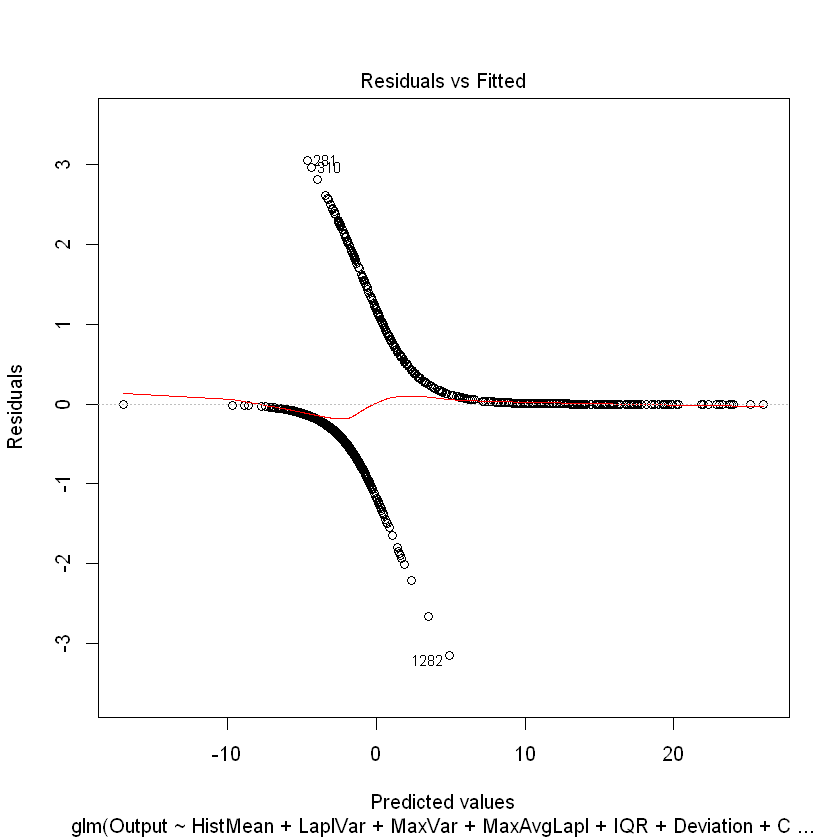

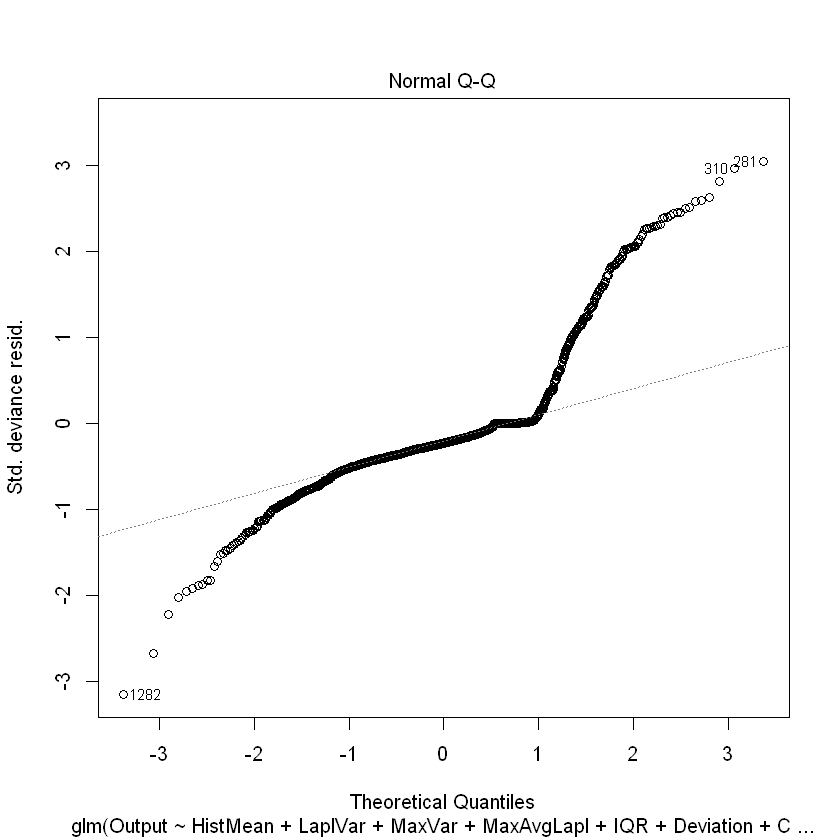

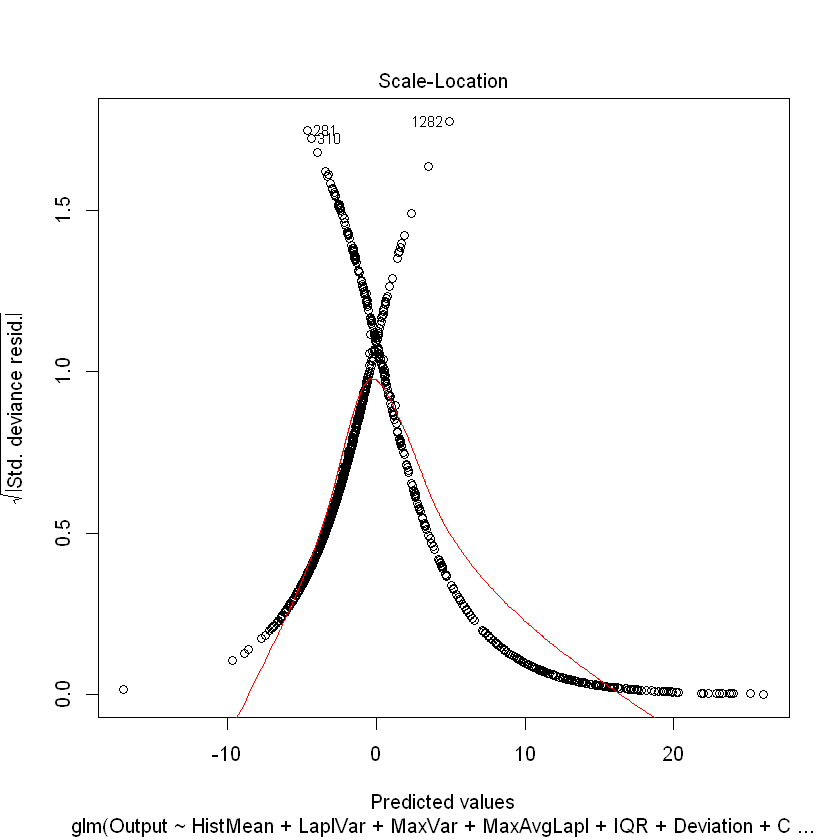

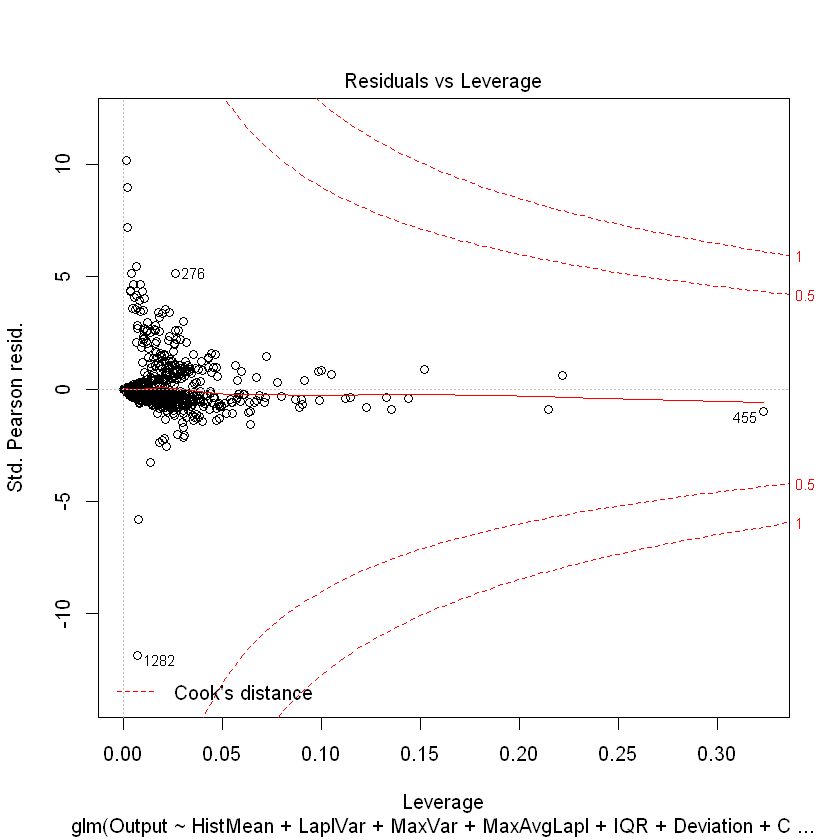

In [7]:
plot(model)